# Regularization

By Laxman Singh Tomar

In this tutorial, I'll analyze and cover the workflow of popular Reugularization techniques such as Ridge Regression and Lasso Regression. I'll tell you the maths lying behind the scenes and would implement them with visualizations; in order to make you see why something is the way it's.

---

# Outline

1. Regularization
    
    - 1.1 Ridge & Lasso Regression
    - 1.2 Visualizing Regularization
    - 1.3 Advice for applying Regularization


2. Acknowledgements & References

---

# 1. Introduction to Tutorial

## 1.1 Tutorial Objective

To understand the need for Regularization in Machine Learning landscape; and to cement the concepts in my head by implementing them from scratch.

## 1.2 Importing Libraries

In this project, I'll make use of some of the standard machine learning libraries which are available in Scikit-learn along with Numpy and Pandas for Data Analysis and Matplotlib for Data Visualization.

In [2]:
 # For data analysis
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# Packages from scikit-learn
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Magic functions from Jupyter
# For inline plot
%matplotlib inline

#For printing versions
%reload_ext watermark

# For  making the notebook reload external python modules
%reload_ext autoreload
%autoreload 2

# For enabling retina(high resolution) plots
%config InlineBackend.figure_format = 'retina'

%watermark -p sklearn
%watermark -v -m --iversions

sklearn 0.21.2
numpy      1.16.4
pandas     0.24.2
matplotlib 3.1.0
CPython 3.7.3
IPython 7.6.1

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


---

# Regularization

Before straight jumping onto Regularization, I'd like to give you a quick little recap on **Bias-Variance Tradeoff** and the notion of **Overfitting**.

- **Bias-Variance Tradeoff:** When we are talking about prediction models, prediction errors can be decomposed into two main subcomponents that we gotta care about: error which occurs due to "bias" and error which occurs due to "variance". Understanding these two types of errors can help us diagnose model results and avoid the mistake of over/under fitting. A graph given below shows it:

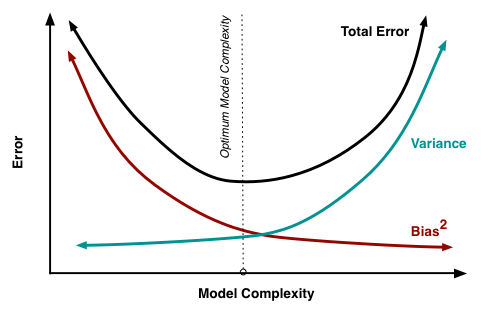
    
- **Bias:** The red line, measures how far off in general our models' predictions are from the correct value. Thus as our model gets more and more complex we will become more and more accurate about our predictions henceforth out error steadily decreases.


- **Variance:** The cyan line,on the other hand, measures how different can our model be from one another, as we're looking at different possible datasets. If the estimated model will vary dramatically from one dataset to the other, then we will have vary erratic predictions, because of our predictions will be extremely sensitive to what data we obtain. As the complexity of our model rises, variance becomes our primary concern.
 
 
- **Overfitting:** In layman terms, it's when we built a model that is too complex that it matches the training data "too closely" or we can say that the model has started to learn not only the signal but also the noise present in the data. The result of this is that our model will do well on the training data, but won't generalize well on out-of-sample or never-seen-before data.

When creating a model, our goal is to locate the optimum model complexity. If our model complexity exceeds this sweet spot, we are infact overfitting our data; while if our complexity falls short of the sweet spot, we are underfitting the data.

Keeping all of this is mind, the notion of **Regularization** is simply a useful technique to use when we think our model is too complex(model having low bias but high variance). It's a method for "constraining" or "regularizing" the **size of the coefficients**("shrinking" them towards zero). The specific regularization techniques we will be discussing are **Ridge Regression** and **Lasso Regression**.

---

# Ridge and Lasso Regression

Recall that for a normal linear regression model of:$$Y = \beta_0 + \beta_1X_1+...+\beta_pX_p$$

We would estimate it's coefficients using the least squares criterion, which minimizes the residual sum of squares(RSS). Or pictorially, we're fitting the blue line to our data(the black points) that minimizes the sum of the distances between the points and the blue line(sum of the red lines) as shown below:

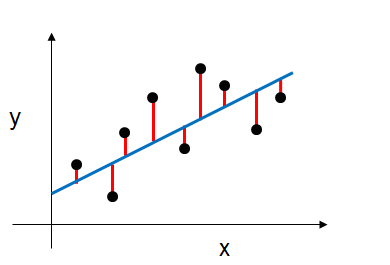

Mathematically, this can be represented as:$$RSS = \sum_{i=1}^{n}\bigg(y_i-(\beta_0+\sum_{j=1}^{p}\beta_jx_{ij})\bigg)^2$$

where:

- $n$ is the **total number of observations(data)**
- $y_i$ is the **actual output value of the observations(data)**
- $p$ is the **total number of features**
- $\beta_j$ is a **model's coefficient**
- $x_{ij}$ is the $i^{th}$ **observation**,$j^{th}$ **feature's value**
- $\beta_0+\sum_{j=1}^{p}\beta_jx_{ij}$ is the **predicted output of each observation**.

Regularized linear regression models are pretty similar to least squares, except that the coefficients are estimated by minimizing a slightly different objective function. We **minimize the sum of RSS and a "penlaty term"** that penalizes coefficient size.

**Ridge Regression**(or "L2 Regularization") minimizes:$$RSS+\alpha\sum_{j=1}^{p}\beta^2_j$$

**Lasso Regression**(or "L1 Regularization") minimizes:$$RSS+\alpha\sum_{j=1}^{p}\lvert\beta_j\rvert$$
where $\alpha$ is a *tuning parameter* that seeks to balance between the fit of the model to the data and the magnitude of the model's coefficients:

- A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.

- Increasing $\alpha$ penalizes the coefficients and thus shrinks them towards zero.

You can understand it in this manner that we're balancing two things to measure the model's total quality. The RSS, measures how well the model is going to fit the data, and then the magnitude of the coefficients, which can be problematic if they become too large.


Enough theory, Let's dive into some examples straight-away. In the following section, we'll load the **[Boston Housing Dataset](http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/housing-dscr.txt)**, which contains some dataset about the housing values in suburbs of Boston. We'll choose the first few features, train a ridge and lasso regression separately and look at the estimated coefficients' weight for different $\alpha$ parameter.

Note that we're choosing the first few features because we'll later use a plot to show the affect of the $\alpha$ parameter on the estimated coefficients' weight and too many features will make the plot pretty unappealing. The model's interpretability or performance is not the main focus here.

In [3]:
# Extracting input and response variables (housing prices), 
# Meaning of each variable is in the link above
feature_num = 7
boston = load_boston()
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [4]:
# Splitting into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [5]:
# Loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(1, 5)
print('Different alpha values:', alphas)

# Stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

Different alpha values: [   10   100  1000 10000]


In [6]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

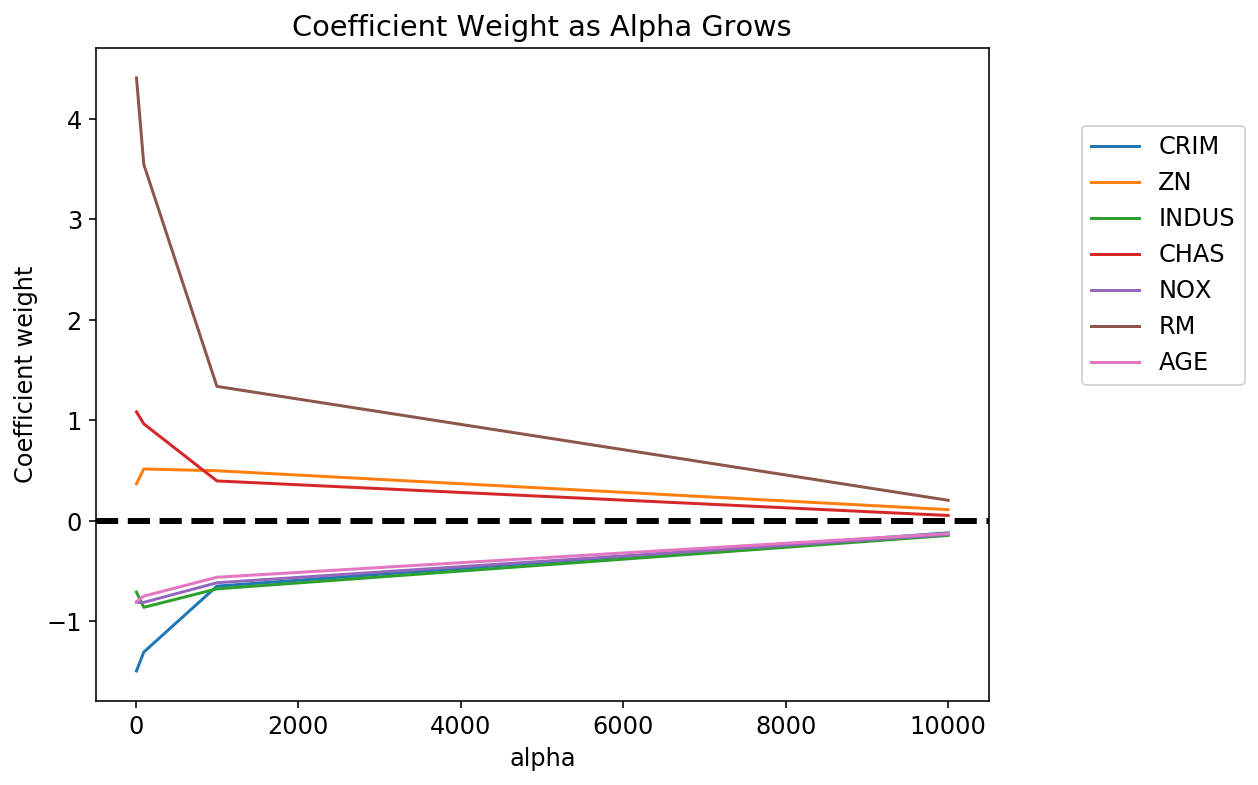

In [7]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12


ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


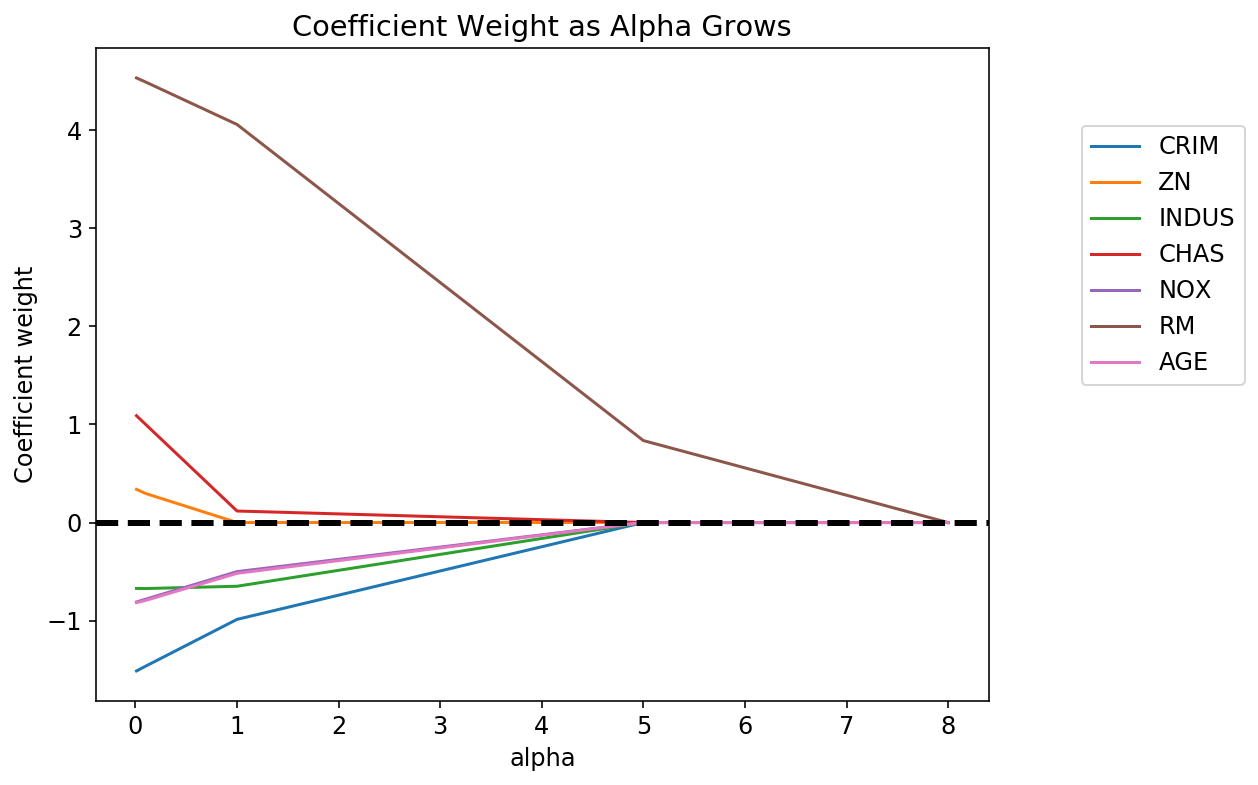

In [8]:
# Does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)